In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_pl.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv
/kaggle/input/entity-sentiment-extraction-news/sen_pl_nooutlier.csv
/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv
/kaggle/input/new-articles-modi/articles-narendra-modi-may-jun-2024.csv


In [2]:
SEN_en_AMT_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT_nooutlier.csv', index_col=False)
SEN_en_R_nooutlier_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R_nooutlier.csv', index_col=False)
SEN_en_R_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_R.csv', index_col=False)
SEN_en_AMT_df = pd.read_csv('/kaggle/input/entity-sentiment-extraction-news/SEN_en_AMT.csv', index_col=False)

In [3]:
SEN_en_AMT_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,Negative
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,Neutral
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,Neutral
3,3,Trump’s Arrival in London Brings Controversy b...,Trump,Negative
4,4,Trump Steers Clear of War Footing Toward Iran,Trump,Neutral


In [4]:
SEN_en_R_nooutlier_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Set to Meet With Russia’s Top Diplomat T...,Trump,neutr


In [5]:
SEN_en_R_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Boris Johnson Joins Trump in Redefining Conser...,Trump,neutr
1,1,Trump Praises Controversial Hungarian Leader,Trump,neg
2,2,Stung by Trump’s Criticisms of Russian Gas Dea...,Trump,neutr
3,3,What ‘America First’ Means Under Trump Is Comi...,Trump,neutr
4,4,Trump Calls for NATO Expansion Into Middle East,Trump,pos


In [6]:
SEN_en_AMT_df.head()

,Unnamed: 0,headline,entity,majority_label
0,0,Russia and Poland Feud Over Putin Remarks on W...,Putin,neg
1,1,Trump Moves to Lift Visa Restrictions on Polis...,Trump,neutr
2,2,Trump-Backed U.S.-British Trade Deal Faces Hur...,Trump,neutr
3,3,Trump Praises Lame-Duck U.K. Leader Theresa May,Trump,neutr
4,4,Trump’s Arrival in London Brings Controversy b...,Trump,neg


In [7]:
len(SEN_en_AMT_df), len(SEN_en_AMT_nooutlier_df)

(1361, 1345)

In [8]:
len(SEN_en_AMT_df.headline.unique())

1337

<Axes: xlabel='majority_label', ylabel='count'>

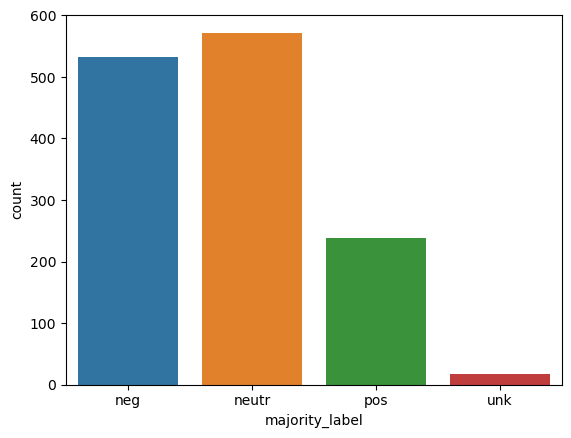

In [9]:
sns.countplot(SEN_en_AMT_df, x='majority_label')

In [10]:
len(SEN_en_R_df), len(SEN_en_R_nooutlier_df)

(1271, 1120)

<Axes: xlabel='majority_label', ylabel='count'>

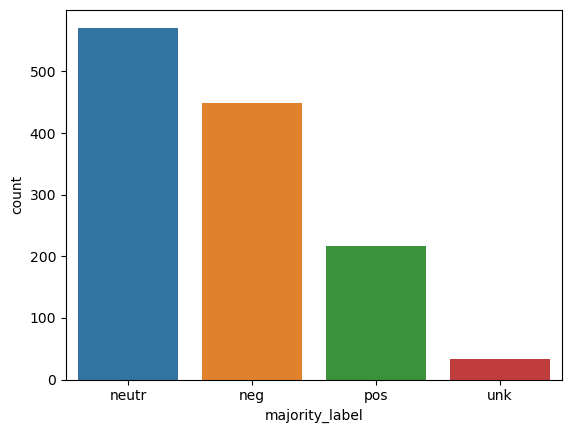

In [11]:
sns.countplot(SEN_en_R_df, x='majority_label')

In [12]:
SEN_en_AMT_df.iloc[0].headline

'Russia and Poland Feud Over Putin Remarks on World War II'

# Trying out with Bert-ABSA 
[Article](https://towardsdatascience.com/day-103-nlp-research-papers-utilizing-bert-for-aspect-based-sentiment-analysis-via-constructing-38ab3e1630a3)

In [13]:
# !python -m pip install newsapi-python

# from newsapi import NewsApiClient
# from tqdm import tqdm, notebook
# import pandas as pd

# API_KEY = 'key'
# newsapi = NewsApiClient(api_key=API_KEY)

# from datetime import datetime, timedelta

# def get_past_time_range(days=1):
#     past_days = {}
#     for day in range(1, days):
#         from_day = str(datetime.now().date() - timedelta(days=day))
#         to_day = str(datetime.now().date() - timedelta(days=day - 1))
#         past_days.update({from_day:to_day})
#     return past_days

# def get_articles(query, days=30):
#     past_days_filter = get_past_time_range(days)
#     all_articles = []
#     print(past_days_filter)
#     for fromDate,toDate in notebook.tqdm(past_days_filter.items()):
#         for page in range(1, 3):
#             try:
#                 print(fromDate)
#                 response = newsapi.get_everything(q=query, language='en', from_param=fromDate, to=toDate,sort_by='relevancy', page=page)
#                 page_articles = response['articles']
#                 if len(page_articles) == 0: break
#                 all_articles.extend(page_articles)
#             except:
#                 break
            
#     return all_articles

# articles = get_articles('Narendra modi')

# print(len(articles))


# articles_df = pd.DataFrame(articles)
# articles_df.head()

# articles_df.to_csv('articles-narendra-modi-may-jun-2024.csv')

In [14]:
# articles[0]['title']

In [15]:
news_df = pd.read_csv('/kaggle/input/new-articles-modi/articles-narendra-modi-may-jun-2024.csv')
news_df = news_df.drop(['Unnamed: 0'], axis=1)
news_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Associated Press Videos,Biden to honor Modi with pomp-filled state visit,President Joe Biden is set to honor Prime Mini...,https://news.yahoo.com/biden-honor-modi-pomp-f...,https://s.yimg.com/ny/api/res/1.2/QA1AlhDRU2w0...,2023-06-19T05:10:16Z,<ul><li>\r\n</li></ul>\r\nPresident Joe Biden ...
1,"{'id': None, 'name': 'The Indian Express'}",PTI,Javed Miandad doesn’t want Pakistan to tour In...,"As per the draft schedule prepared by the ICC,...",https://indianexpress.com/article/sports/crick...,https://images.indianexpress.com/2023/06/Javed...,2023-06-19T05:20:57Z,Batting great Javed Miandad spewed fresh venom...
2,"{'id': None, 'name': 'The Indian Express'}",Express News Service,Uddhav Thackeray the ‘real gaddar’: Fadnavis,Referring to Uddhav Thackeray’s attack on PM M...,https://indianexpress.com/article/cities/mumba...,https://images.indianexpress.com/2023/06/DFE.jpg,2023-06-19T16:32:15Z,Shiv Sena (UBT) president Uddhav Thackeray who...
3,"{'id': None, 'name': 'The Indian Express'}",PTI,Every passing day of neglect confirms belief t...,The Congress' attack came a day after it deman...,https://indianexpress.com/article/north-east-i...,https://images.indianexpress.com/2023/06/Manip...,2023-06-19T13:26:04Z,The Congress on Monday stepped up its attack o...
4,"{'id': None, 'name': 'The Indian Express'}",Express New Service,Haryana aims to connect Hisar heliport with ma...,Giving details about the state government's pl...,https://indianexpress.com/article/cities/chand...,https://images.indianexpress.com/2023/06/Helip...,2023-06-19T12:21:22Z,"Under the UDAN scheme, Haryana is aiming to co..."


In [16]:
articles = news_df.description.values
len(articles)

5715

In [17]:
import spacy
from spacy import displacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [19]:
spacy_model = spacy.load("en_core_web_sm")

In [20]:
sentences = [text.strip() for text in articles[9].split('.')]
sentences

['Addressing a press conference here, he said all aspects of defence co-production and co-development will be part of the discussions between Modi and US President Joe Biden',
 '']

In [21]:
for sentence in sentences:
    doc = spacy_model(sentence)
    print("\n\nSentence: {} \n".format(sentence))
    displacy.serve(doc, style="dep")
#     for token in doc:
#         print(token.text, token.dep_, token.head.text, token.head.pos_, token.pos_,[child for child in token.children])



Sentence: Addressing a press conference here, he said all aspects of defence co-production and co-development will be part of the discussions between Modi and US President Joe Biden 



/opt/conda/lib/python3.10/site-packages/spacy/displacy/__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Sentence:  




Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Using Allen models for coreference resolution

In [23]:
!pip install allennlp
!pip install allennlp-models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 43.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 23.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 23.1 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 81.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━

In [24]:
from allennlp.predictors.predictor import Predictor

model_url = "https://storage.googleapis.com/allennlp-public-models/coref-spanbert-large-2020.02.27.tar.gz"
predictor = Predictor.from_path(model_url)

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libc10_cuda.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


Output()

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/634M [00:00<?, ?B/s]

Some weights of BertModel were not initialized from the model checkpoint at SpanBERT/spanbert-large-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
text = news_df.iloc[0].title + '. ' + news_df.iloc[0].description
text

In [ ]:
aspects = []
for sentence in sentences:
    doc = spacy_model(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspects.append({'aspect': target,'description': descriptive_term})
print(aspects)